## DataFrame
#### DataFrame 是一个表格型的数据结构，他有一组有序的列，每列可以是不同值得类型（数值，字符串，bool）
#### DataFrame 有行索引，也有列索引
#### DataFrame 可以理解为Series组成的字典

In [3]:
# 构建一个DataFrame
from pandas import Series,DataFrame
data = {
    "60年代":["小宝", "石头", "狗蛋"],
    "70年代":["建国", "爱国", "卫国"],
    "80年代":["艾玛", "张伟", "李磊"]
}
frame_data = DataFrame(data)
print(frame_data)
print(frame_data["70年代"])

  60年代 70年代 80年代
0   小宝   建国   艾玛
1   石头   爱国   张伟
2   狗蛋   卫国   李磊
0    建国
1    爱国
2    卫国
Name: 70年代, dtype: object


In [9]:
import numpy as np
import pandas as pd
dates = pd.date_range('20190302', periods=6)
print(dates)

DatetimeIndex(['2019-03-02', '2019-03-03', '2019-03-04', '2019-03-05',
               '2019-03-06', '2019-03-07'],
              dtype='datetime64[ns]', freq='D')


In [10]:
df = pd.DataFrame(np.random.rand(6,4), index=dates, columns=list('ABCD'))
print(df)

                   A         B         C         D
2019-03-02  0.032084  0.743554  0.419247  0.848045
2019-03-03  0.978311  0.017175  0.393047  0.049260
2019-03-04  0.026668  0.937585  0.071676  0.974522
2019-03-05  0.528080  0.360692  0.156651  0.213227
2019-03-06  0.142239  0.819067  0.194076  0.207083
2019-03-07  0.469043  0.401219  0.980625  0.709985


In [11]:
df.T

2019-03-02  2019-03-03  2019-03-04  2019-03-05  2019-03-06  2019-03-07
A    0.032084    0.978311    0.026668    0.528080    0.142239    0.469043
B    0.743554    0.017175    0.937585    0.360692    0.819067    0.401219
C    0.419247    0.393047    0.071676    0.156651    0.194076    0.980625
D    0.848045    0.049260    0.974522    0.213227    0.207083    0.709985

In [12]:
df["20190302":"20190305"]
### python 左闭右开原则 dataFrame 不是的

A         B         C         D
2019-03-02  0.032084  0.743554  0.419247  0.848045
2019-03-03  0.978311  0.017175  0.393047  0.049260
2019-03-04  0.026668  0.937585  0.071676  0.974522
2019-03-05  0.528080  0.360692  0.156651  0.213227

In [14]:
df.loc["20190302":"20190305", ["A", "B"]]

A         B
2019-03-02  0.032084  0.743554
2019-03-03  0.978311  0.017175
2019-03-04  0.026668  0.937585
2019-03-05  0.528080  0.360692

In [16]:
df.at[dates[0], "A"]

0.03208398934111323

In [17]:
df.head(2)

A         B         C         D
2019-03-02  0.032084  0.743554  0.419247  0.848045
2019-03-03  0.978311  0.017175  0.393047  0.049260

In [18]:
df.tail(3)

A         B         C         D
2019-03-05  0.528080  0.360692  0.156651  0.213227
2019-03-06  0.142239  0.819067  0.194076  0.207083
2019-03-07  0.469043  0.401219  0.980625  0.709985

#### DataFrame构造函数能够接受哪些数据类型呢
1.二维数组 numpy array <br>
2.有数组列表或者元祖组成的字典 <br>
3.字典组成的字典 <br>
4.由Series组成的字典 <br>
5.字典或Series的列表 <br>
6.由列表或元祖组成的列表 <br>

#### pandas 重新索引 reindex

In [21]:
obj = Series([4.5, 9.8, -1.2], index=['a', 'b', 'c'])
print(obj)
job_1 = obj.reindex(['a', 'b', 'c', 'e', 'f'])
print(job_1)

a    4.5
b    9.8
c   -1.2
dtype: float64
a    4.5
b    9.8
c   -1.2
e    NaN
f    NaN
dtype: float64


In [22]:
obj.reindex(['a', 'b', 'c', 'e', 'f'], fill_value=1)

a    4.5
b    9.8
c   -1.2
e    1.0
f    1.0
dtype: float64

In [24]:
obj = Series([4.5, 9.8, -1.2], index=[0,2,4])
o = obj.reindex(range(6), method="bfill") #前向值填充 bfill 后向填充
print(obj)
print(o)

0    4.5
2    9.8
4   -1.2
dtype: float64
0    4.5
1    9.8
2    9.8
3   -1.2
4   -1.2
5    NaN
dtype: float64


### 算数运算和数据对齐
####  pandas的重要功能 就是可以对不同索引的对象进行算数运算，在将对象相加时如果存在不同的索引时，则结果的索引就是该索引的并集

In [26]:
d1= Series([1.3, 1.5,2.6, -3.5], index=['a', 'b', 'c', 'd'])
d2= Series([-1.6, -1.5,-2.3, -3.9, 11], index=['a', 'b', 'c', 'd', 'f'])
d1+d2

a   -0.3
b    0.0
c    0.3
d   -7.4
f    NaN
dtype: float64

In [28]:
df1 = DataFrame(np.arange(9).reshape(3,3), columns=list("abc"), index=[1,2,3])
print(df1)

   a  b  c
1  0  1  2
2  3  4  5
3  6  7  8


In [31]:
df2 = DataFrame(np.arange(12).reshape(4,3), columns=list("cde"), index=[1,2,3, 4])
print(df2)

   c   d   e
1  0   1   2
2  3   4   5
3  6   7   8
4  9  10  11


In [32]:
df1 + df2

a   b     c   d   e
1 NaN NaN   2.0 NaN NaN
2 NaN NaN   8.0 NaN NaN
3 NaN NaN  14.0 NaN NaN
4 NaN NaN   NaN NaN NaN

In [33]:
df1.add(df2, fill_value= 0) #用0来填充不重叠的值 如果本身为空 那么还是空

a    b     c     d     e
1  0.0  1.0   2.0   1.0   2.0
2  3.0  4.0   8.0   4.0   5.0
3  6.0  7.0  14.0   7.0   8.0
4  NaN  NaN   9.0  10.0  11.0

### 排序 
#### 根据条件对数据集进行排序

In [35]:
obj = Series(range(4), index=['d', 'e', 'a', 'b'])
print(obj)

d    0
e    1
a    2
b    3
dtype: int64


In [36]:
obj.sort_index()

a    2
b    3
d    0
e    1
dtype: int64

In [38]:
obj.sort_values()

d    0
e    1
a    2
b    3
dtype: int64

In [44]:
### 针对DataFrame，根据任意一个轴上的索引进行排序 
frame = DataFrame(np.arange(8).reshape((2,4)), index=['two', 'one'], columns=['c','d','a','b'])
print(frame)

     c  d  a  b
two  0  1  2  3
one  4  5  6  7


In [45]:
frame.sort_index()

c  d  a  b
one  4  5  6  7
two  0  1  2  3

In [46]:
frame.sort_index(axis=1)

a  b  c  d
two  2  3  0  1
one  6  7  4  5

In [47]:
frame = DataFrame({'b':[4,-3, 2.1, 0], 'a':[3,3,-1,-2]})

In [48]:
frame

b  a
0  4.0  3
1 -3.0  3
2  2.1 -1
3  0.0 -2

In [50]:
frame.sort_values(by='a')

b  a
3  0.0 -2
2  2.1 -1
0  4.0  3
1 -3.0  3

### 层次化索引
#### 层次化索引是pandas的一项比较重要的功能，它能够让你在一个轴上有多个索引级别，另一中说法是他以低纬度处理高纬度数据

In [62]:
data = Series(np.arange(10), index=[['a','a','a','b','b','b','c','c','d','d'], [1,2,3,4,5,6,7,8,1,2]])

In [63]:
data

a  1    0
   2    1
   3    2
b  4    3
   5    4
   6    5
c  7    6
   8    7
d  1    8
   2    9
dtype: int32

In [64]:
data.index

MultiIndex([('a', 1),
            ('a', 2),
            ('a', 3),
            ('b', 4),
            ('b', 5),
            ('b', 6),
            ('c', 7),
            ('c', 8),
            ('d', 1),
            ('d', 2)],
           )

In [65]:
data['b']

4    3
5    4
6    5
dtype: int32

In [68]:
data['b':'d']

b  4    3
   5    4
   6    5
c  7    6
   8    7
d  1    8
   2    9
dtype: int32

In [69]:
data[:, 2]

a    1
d    9
dtype: int32

In [70]:
data.unstack()#生产新的dataFrame

1    2    3    4    5    6    7    8
a  0.0  1.0  2.0  NaN  NaN  NaN  NaN  NaN
b  NaN  NaN  NaN  3.0  4.0  5.0  NaN  NaN
c  NaN  NaN  NaN  NaN  NaN  NaN  6.0  7.0
d  8.0  9.0  NaN  NaN  NaN  NaN  NaN  NaN

In [71]:
data.unstack().stack() 

a  1    0.0
   2    1.0
   3    2.0
b  4    3.0
   5    4.0
   6    5.0
c  7    6.0
   8    7.0
d  1    8.0
   2    9.0
dtype: float64

In [73]:
## 对于DataFrame,每条轴都可以有分层索引的，各层都可以有名字
frame_data = DataFrame(np.arange(12).reshape((4,3)), index=[['a', 'a', 'b', 'b'], [1, 2, 1, 2]],
                      columns=[['Black', 'Yellow', 'Blue'], ['Green', 'Red', 'Green']])

In [74]:
frame_data

Black Yellow  Blue
    Green    Red Green
a 1     0      1     2
  2     3      4     5
b 1     6      7     8
  2     9     10    11

In [76]:
frame_data.index.names=['key1', 'key2']
frame_data

Black Yellow  Blue
          Green    Red Green
key1 key2                   
a    1        0      1     2
     2        3      4     5
b    1        6      7     8
     2        9     10    11

In [78]:
frame_data.columns.names=['color1', 'color2']
frame_data

color1    Black Yellow  Blue
color2    Green    Red Green
key1 key2                   
a    1        0      1     2
     2        3      4     5
b    1        6      7     8
     2        9     10    11

In [79]:
frame_data = DataFrame(np.arange(12).reshape((4,3)), index=[['a', 'a', 'b', 'b'], [1, 2, 1, 2]],
                      columns=[['Black', 'Yellow', 'Black'], ['Green', 'Red', 'Blue']])
frame_data

Black Yellow Black
    Green    Red  Blue
a 1     0      1     2
  2     3      4     5
b 1     6      7     8
  2     9     10    11

In [81]:
frame_data['Black'] #对列进行筛选

Green  Blue
a 1      0     2
  2      3     5
b 1      6     8
  2      9    11

In [82]:
#行和列同事进行访问筛选
frame_data.loc['a', ['Black']]

Black     
  Green Blue
1     0    2
2     3    5

In [84]:
#根据级别汇总统计
frame_data.index.names=['key1', 'key2']
frame_data.sum(level='key1')

Black Yellow Black
     Green    Red  Blue
key1                   
a        3      5     7
b       15     17    19

In [86]:
frame_data.columns.names=['color1', 'color2']
frame_data

color1    Black Yellow Black
color2    Green    Red  Blue
key1 key2                   
a    1        0      1     2
     2        3      4     5
b    1        6      7     8
     2        9     10    11

In [89]:
frame_data.sum(level='color2', axis=1)

color2     Green  Red  Blue
key1 key2                  
a    1         0    1     2
     2         3    4     5
b    1         6    7     8
     2         9   10    11

In [90]:
frame_data.sum(level='color1', axis=1)

color1     Black  Yellow
key1 key2               
a    1         2       1
     2         8       4
b    1        14       7
     2        20      10

### pandas 文本格式数据处理 
read_csv 从文件，url, 文件型对象中加载带分隔号的文本数据，默认分隔符为逗号 <br>
read_table 从文件url、文件型对象中加载带分隔符的数据，默认分割符号为制表符'\t'<br>
read_fwf: 读取固定宽列格式数据<br>
read_clipboard:读取剪切板的数据，可以看做是read_table的剪切板，可以用在将网页中的数据转换为表格中数据时用到<br>

In [98]:
import csv

# 1. 创建文件对象
f = open('data.csv','w',encoding='utf-8')
# 2. 基于文件对象构建 csv写入对象
csv_writer = csv.writer(f)

# 3. 构建列表头
csv_writer.writerow(['a', 'b', 'c', 'd', 'e'])
csv_writer.writerow([1, 2, 3, 4, 5])
csv_writer.writerow([6, 7, 8, 9, 10])
f.close()

In [99]:
pd.read_csv("data.csv")

a  b  c  d   e
0  1  2  3  4   5
1  6  7  8  9  10

In [100]:
pd.read_csv("data.csv", sep=',') #指定分隔符

a  b  c  d   e
0  1  2  3  4   5
1  6  7  8  9  10

In [101]:
pd.read_csv("data.csv", header=None) #没有头部，所有文件里的数据时目标数据，自动给你生成头部

0  1  2  3   4
0  a  b  c  d   e
1  1  2  3  4   5
2  6  7  8  9  10

In [102]:
pd.read_csv("data.csv", index_col='c') #指定c列为索引列

a  b  d   e
c             
3  1  2  4   5
8  6  7  9  10

In [103]:
pd.read_csv("data.csv", index_col=['c', 'd']) #指定多列为索引列

a  b   e
c d          
3 4  1  2   5
8 9  6  7  10

In [105]:
pd.read_csv("data2.csv") # 文本中的BA代表就是空

a   b   c   d  message   data
0      1   2   3   4        5    NaN
1  hello   6   7   8        9  world
2    NaN  hi  10  11       12     14

In [106]:
pd.read_csv("data2.csv", skiprows=[1])#不读取哪一行

a   b   c   d  message   data
0  hello   6   7   8        9  world
1    NaN  hi  10  11       12     14

In [107]:
data = pd.read_csv("data2.csv")
pd.isnull(data)

a      b      c      d  message   data
0  False  False  False  False    False   True
1  False  False  False  False    False  False
2   True  False  False  False    False  False

In [109]:
### 大文件读取
data = pd.read_csv("data2.csv", nrows=1)
data

a  b  c  d  message  data
0  1  2  3  4        5   NaN

In [111]:
data.to_csv("data3.csv", sep="|")

### 读取excel 数据

In [113]:
excel = pd.read_excel("rand.xls")
excel

id  age  place
0   1   11     21
1   2   12     22
2   3   13     23
3   4   14     24
4   5   15     25
5   6   16     26
6   7   17     27
7   8   18     28
8   9   19     29
9  10   20     30

In [116]:
excel2 = pd.read_excel("rand.xls", sheet_name="Sheet2")
print(excel2)

id  age  place
0   1   11    110
1   2   12    111
2   3   13    112
3   4   14    113
4   5   15    114
5   6   16    115
6   7   17    116
7   8   18    117
8   9   19    118
9  10   20    119

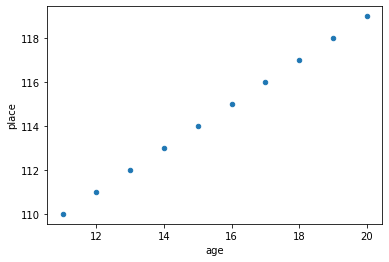

In [119]:
pl = excel.plot(kind="scatter", x="age", y="place").get_figure()

In [120]:
pl.savefig("1.png")

In [123]:
dates = pd.date_range("20210224", periods=6)
df = pd.DataFrame(np.random.rand(6,4), index=dates, columns=list('ABCD'))
print(df)

                   A         B         C         D
2021-02-24  0.854387  0.358487  0.636373  0.496683
2021-02-25  0.257499  0.809511  0.424588  0.944199
2021-02-26  0.268487  0.987055  0.176573  0.211211
2021-02-27  0.798533  0.315414  0.072655  0.216840
2021-02-28  0.808167  0.308374  0.103581  0.177912
2021-03-01  0.820974  0.431533  0.051496  0.438927


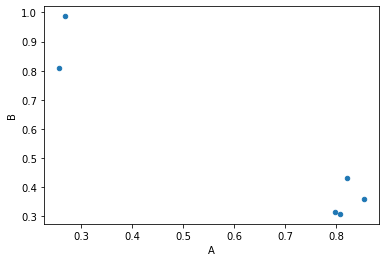

In [126]:
p1 = df.plot(kind="scatter", x="A", y="B").get_figure()
p1.savefig("2.png")

### matplotlib 

In [127]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(np.arange(10))
#plt.figure()

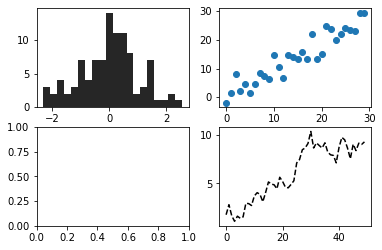

In [133]:
from numpy.random import randn
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)
plt.plot(randn(50).cumsum(), 'k--') #灰色
ax1.hist(randn(100), bins=20, color='k', alpha=0.85)
ax2.scatter(np.arange(30), np.arange(30) + 3*randn(30))

In [134]:
plt.plot(randn(50).cumsum(), 'g--') #灰色

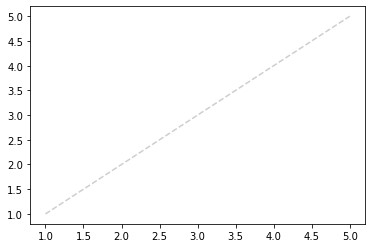

In [136]:
x = [1,2,3,4,5]
y = [1,2,3,4,5]
plt.plot(x, y, linestyle='--', color="#CECECE")

<AxesSubplot:>

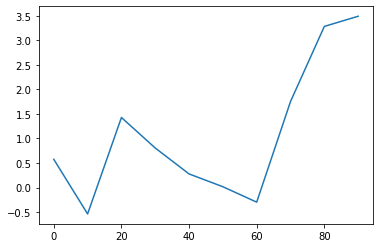

In [140]:
from pandas import Series, DataFrame
s = Series(randn(10).cumsum(), index=np.arange(0,100,10))
s.plot()